<a href="https://colab.research.google.com/github/ErandySV/Simulaci-n-I/blob/main/Transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Camión de transporte
La empresa TIBASA, fabricante de tinas de baño tiene asignado un camion especial
para el transporte de tinas terminadas. Dicho camion transporta diariamente 5 tinas.
El peso de cada tina sigue la siguiente distribución de probabilidad:

Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso
de las tinas exceda la capacidad del camión?

a) Resolver analíticamente

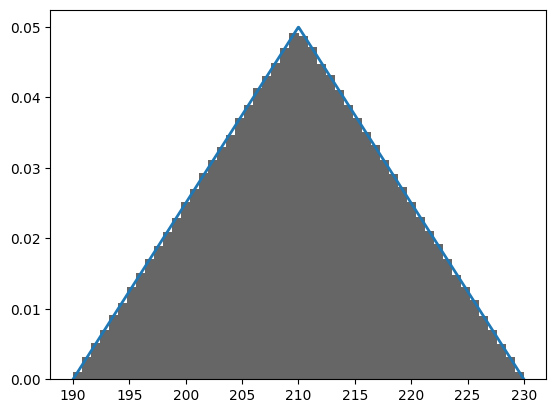

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang
import math

# Parámetros de la distribución triangular
a = 190.0
b = 230.0
c = 210.0

repeticiones = 1000000
valores = [random.triangular(a, b, c) for _ in range(repeticiones)]

# Crear el histograma de los valores generados
plt.hist(valores, bins=50, density=True, alpha=0.6, color='black', label='Histograma')


c_scaled = (c - a) / (b - a)
x = np.linspace(a, b, 1000)
plt.plot(x, triang.pdf(x, c_scaled, loc=a, scale=b-a), lw=2, label='Distribución teórica')


# Mostrar la gráfica
plt.show()

# *Por el teorema central del límite*

se cumple que:

$$
\lim_{n \to \infty} P\left(\frac{x_1 + x_2 + \cdots + x_n - n \mu}{\sigma \sqrt{n}} < x\right) = \Phi(x)
$$

Para n=5 porque cargaremos el camión con 5 tinas

$$
 P\left({x_1 + x_2 + \cdots + x_5} > 1000kg\right)
$$

Equivalentemente tenemos que P es:

$$
P\left({(x_1 + x_2 + \cdots + x_5)} < 1000kg\right) =  P\left(\frac{x_1 + x_2 + \cdots + x_5}5 > 200kg\right)
$$

Aplicando el teorema tenemos que:
$$
\lim_{n \to \infty} P\left(\
\frac{{x_1 + x_2 + \cdots + x_5 }}{{\frac{{5\sigma}}{{\sqrt{5}}}}} < \frac{200 - \mu}{{\frac{{\sigma}}{{\sqrt{5}}}}}\right)
$$

Simplificando tenemos

$$
\lim_{n \to \infty} P\left(\frac{{\sqrt{5} (x_1 + x_2 + \cdots + x_5)}}{5\sigma} < \frac{\sqrt{5}(200 - \mu)}{\sigma}\right)
$$

Sustituyendo valores tenemos que:

limn→∞P(2.23(x1+x2+⋯+x5)40.82<−2.74)

Para z = -2.74, obtenemos el siguiente resultado:
 0.0031
Por lo tanto,

 P=1−0.0031=99.69%

b) Por simulación.

In [10]:


numero_de_ensayos = 10000
sumas = []
probabilidades = []

contador = 0

for ensayo in range(numero_de_ensayos):
    suma_variables = 0
    for i in range(5):
        U = random.uniform(0, 1)
        if 0 <= U <= 0.5:
            X = a + math.sqrt(U * (b - a) * (c - a))
        else:
            X = b - math.sqrt((1 - U) * (b - a) * (b - c))
        suma_variables += X
    sumas.append(suma_variables)

    if suma_variables > 1000:
        contador += 1

    probabilidad_actual = contador / (ensayo + 1)  # ensayo + 1 para evitar división por cero y ajustar el índice
    probabilidades.append(probabilidad_actual)



print("Probabilidad final =", probabilidades[-1])

Probabilidad final = 0.9989


EJERCICIO 2:
Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que
cada vez que la capacidad del camión es excedida una tina es enviada a través de otra
compañía a un costo de $200.
También suponga que el costo promedio anual de un
nuevo camión es de $60,000. Si se trabaja 5 días a la semana y 52 semanas al año,
¿cuál de las dos alternativas mencionadas es la más atractiva?

 **a)Solución analítica**

Calculamos los dias trabajados al año:


1.   5 dias x semana de trabajo
2.   Hay 52 semanas al año



$$
5 \times 52 = 260 \ \text{días de trabajo por año}
$$

Entonces, sabemos que la probabilidad de que se exceda la capacidad del camion es de 99.66 % por lo tanto, podemos definir lo siguiente:

$$
\ 260 { \text{ días}} = 100\%
$$

$$
\ x{\text{ días}} = 99.66\%
$$

por lo tanto, $$ x= 259{\text{ días}}$$

Hagamos una comparación de las dos opciones disponibles


1.   Envio mediante alquiler:
$$ Costo= $200*259{\text{ días}}$$
$$ Costo= $51,800$$

Vemos que nos es más barato el enviar el exceso de peso mediante otra compañia que el comprar una nueva unidad de carga

b) Por Simulación

In [11]:

# Consideraciones
dias_trabajo_anual = 260
costo_exceso = 200
costo_camion = 60000

contador = 0
costo_total_exceso = 0
costo_total_camion = 0

probabilidades = []
costos_exceso = []

for ensayo in range(numero_de_ensayos):
    suma_variables = 0
    for i in range(5):
        U = random.uniform(0, 1)
        if 0 <= U <= 0.5:
            X = a + math.sqrt(U * (b - a) * (c - a))
        else:
            X = b - math.sqrt((1 - U) * (b - a) * (b - c))
        suma_variables += X
    sumas.append(suma_variables)
    if suma_variables > 1000:
        contador += 1
        costo_total_exceso += costo_exceso * dias_trabajo_anual

    probabilidad_actual = contador / (ensayo + 1)
    probabilidades.append(probabilidad_actual)

    costo_promedio_exceso = costo_total_exceso / (ensayo + 1)
    costos_exceso.append(costo_promedio_exceso)


print("Probabilidad final =", probabilidades[-1])
print("Costo promedio del exceso de capacidad =", costos_exceso[-1])
print("Costo promedio de comprar un nuevo camión =", costo_camion)
# Conclusión
if costo_promedio_exceso < costo_camion:
    print("Enviar el exceso de peso mediante otra compañía es más barato.")
else:
    print("Comprar una nueva unidad de carga es más barato.")

Probabilidad final = 0.998
Costo promedio del exceso de capacidad = 51896.0
Costo promedio de comprar un nuevo camión = 60000
Enviar el exceso de peso mediante otra compañía es más barato.
